In [30]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"juandhaniabimanyu","key":"3ebefd8b0e1329a4c2882fbcf1990f12"}'}

In [31]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [32]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 5.35MB/s]


In [33]:
!mkdir sleep-health-and-lifestyle-dataset
!unzip sleep-health-and-lifestyle-dataset.zip -d sleep-health-and-lifestyle-dataset
!ls sleep-health-and-lifestyle-dataset

Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv  
Sleep_health_and_lifestyle_dataset.csv


In [52]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv('/content/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [37]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [41]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [42]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.shape

(374, 13)

<ipython-input-45-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

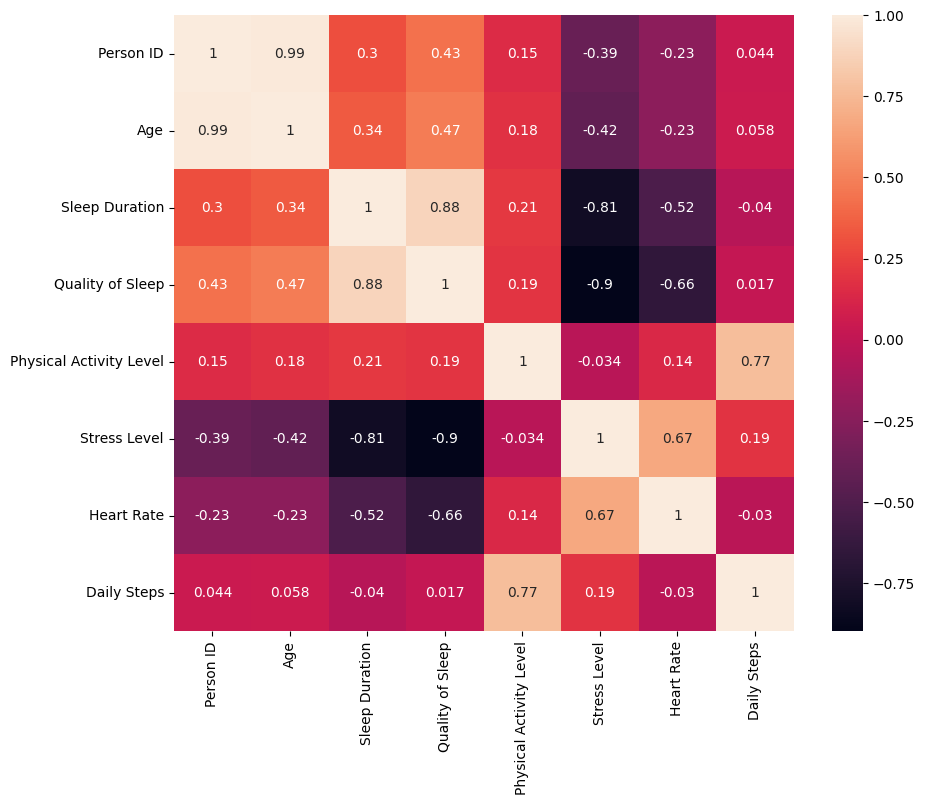

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [47]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [49]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [50]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='Count'>

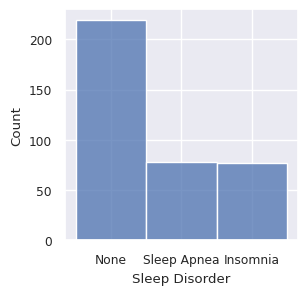

In [54]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='Sleep Disorder')

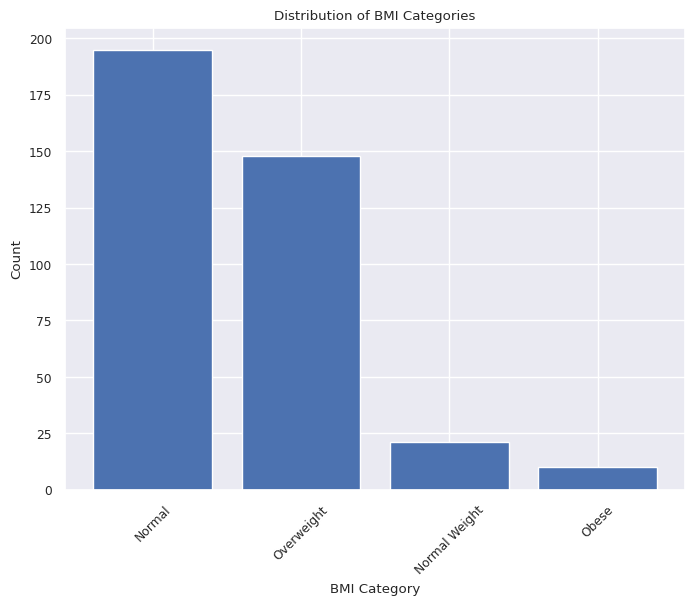

In [63]:
bmi_counts = df['BMI Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bmi_counts.index, bmi_counts.values)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

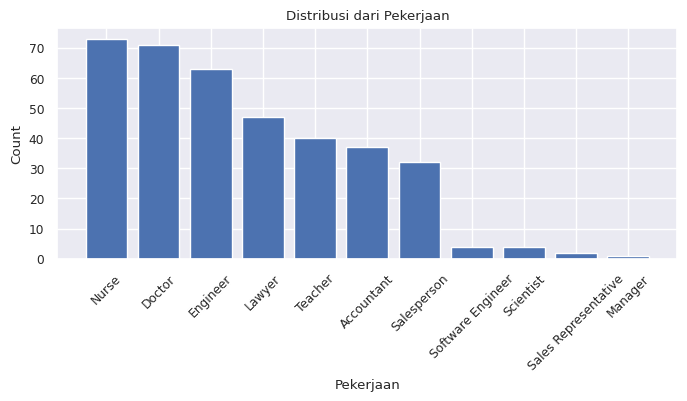

In [70]:
occ_counts = df['Occupation'].value_counts()
plt.figure(figsize=(8, 3))
plt.bar(occ_counts.index, occ_counts.values)
plt.title("Distribusi dari Pekerjaan")
plt.xlabel("Pekerjaan")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['Gender'])
df['Occ'] = label_encoder.fit_transform(df['Occupation'])
df['BMI'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occ,BMI,Sleep,gender
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,9,3,1,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,6,2,2,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,6,2,2,1


In [73]:
df = df.drop('Person ID', axis=1)

In [77]:
df[['BPU', 'BPD']] = df['Blood Pressure'].str.split('/', expand=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occ,BMI,Sleep,gender,BPU,BPD
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,9,3,1,1,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,1,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,1,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,6,2,2,1,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,6,2,2,1,140,90


In [78]:
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'], axis=1)

In [96]:
df.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Occ', 'BMI', 'Sleep',
       'gender', 'BPU', 'BPD'],
      dtype='object')

In [101]:
X = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'Heart Rate', 'Daily Steps', 'Occ', 'BMI', 'gender', 'BPU', 'BPD']]
Y = df['Sleep']

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=2)

In [103]:
print(X.shape, X_train.shape, X_test.shape)

(374, 12) (224, 12) (150, 12)


In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [106]:
print("Akurasi data training : ", training_data_accuracy*100)

Akurasi data training :  85.71428571428571


In [111]:
df[df['Sleep'] == 0].head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occ,BMI,Sleep,gender,BPU,BPD
5,28,5.9,4,30,8,85,3000,9,2,0,1,140,90
6,29,6.3,6,40,7,82,3500,10,2,0,1,140,90
18,29,6.5,5,40,7,80,4000,5,1,0,0,132,87
31,30,6.4,5,35,7,78,4100,5,1,0,0,130,86
67,33,6.0,6,30,8,72,5000,1,0,0,1,125,80


In [108]:
df['Sleep'].value_counts()

1    219
2     78
0     77
Name: Sleep, dtype: int64

In [115]:
input_data = (28,5.9,4,30,8,85,3000,9,2,1,140,90)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction == 0:
    print('Kualitas Tidur Termasuk Kedalam Kategori Insomnia')
elif prediction == 1:
    print('Kualitas Tidur Termasuk Kedalam Kategori Normal')
else:
    print('Kualitas Tidur Termasuk Kedalam Kategori Sleep Apnea')
print()

Kualitas Tidur Termasuk Kedalam Kategori Insomnia



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [117]:
import pickle
filename = 'tidur.sav'
pickle.dump(model, open(filename, 'wb'))